# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [1]:
import numpy as np


def newton_iteration(f, fder, x0, m = 1.0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.

    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy.
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.

    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    for niter in range(maxiter):
        x = x0 - m * f(x0) / fder(x0)
        if np.abs(x - x0) < eps:
            return (x, niter)
        x0 = x
    return (x, niter)

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [2]:
def f1(x: float) -> float:
    return x ** 2 - 1

def fder1(x: float) -> float:
    return 2 * x

print(newton_iteration(f1, fder1, -0.1))
print(newton_iteration(f1, fder1, 0.2))

(-1.0000000000139897, 6)
(1.0000000000107445, 5)


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [3]:
def f2(x: float) -> float:
    return (x ** 2 - 1) ** 2

def fder2(x: float) -> float:
    return 4 * x * (x ** 2 - 1) ** 1

for m in range(1, 6):
    print(f"m = {m}: {newton_iteration(f2, fder2, -4.2, m)}")

m = 1: (-1.0000074040344757, 20)
m = 2: (-1.000000000000064, 5)
m = 3: (-1.0000027199710486, 16)
m = 4: (-4.199999999999999, 999)
m = 5: (70.98327582448036, 999)


https://en.wikipedia.org/wiki/Newton%27s_method#Slow_convergence_for_roots_of_multiplicity_greater_than_1

As per link above if the root has multiplicity greater than 1 covergence rate is rather low and it's beneficial to use modified algorithm. Using m equal to sought root's multiplicity provides quadratic covergence instead on linear.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_11000\3518968434.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


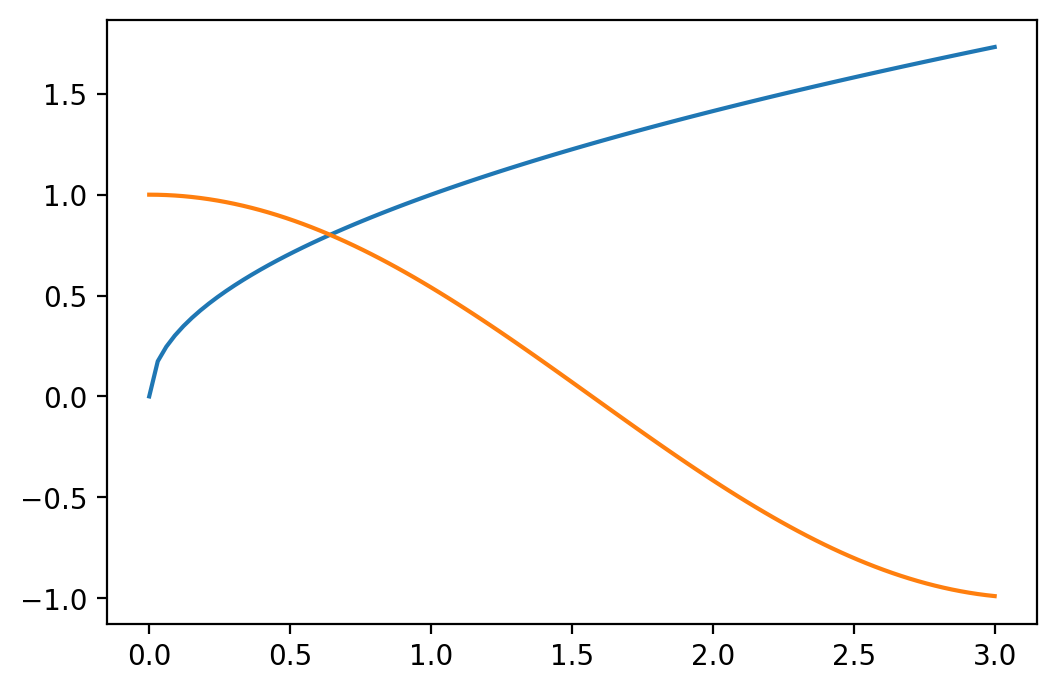

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(0, 3, 100)
fig, ax = plt.subplots(dpi=200)
ax.plot(x, np.sqrt(x))
ax.plot(x, np.cos(x))
fig.show()

C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_11000\2315489487.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x) - np.cos(x)
C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_11000\2315489487.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x) - np.cos(x)
C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_11000\2315489487.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x) - np.cos(x)
C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_11000\2315489487.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


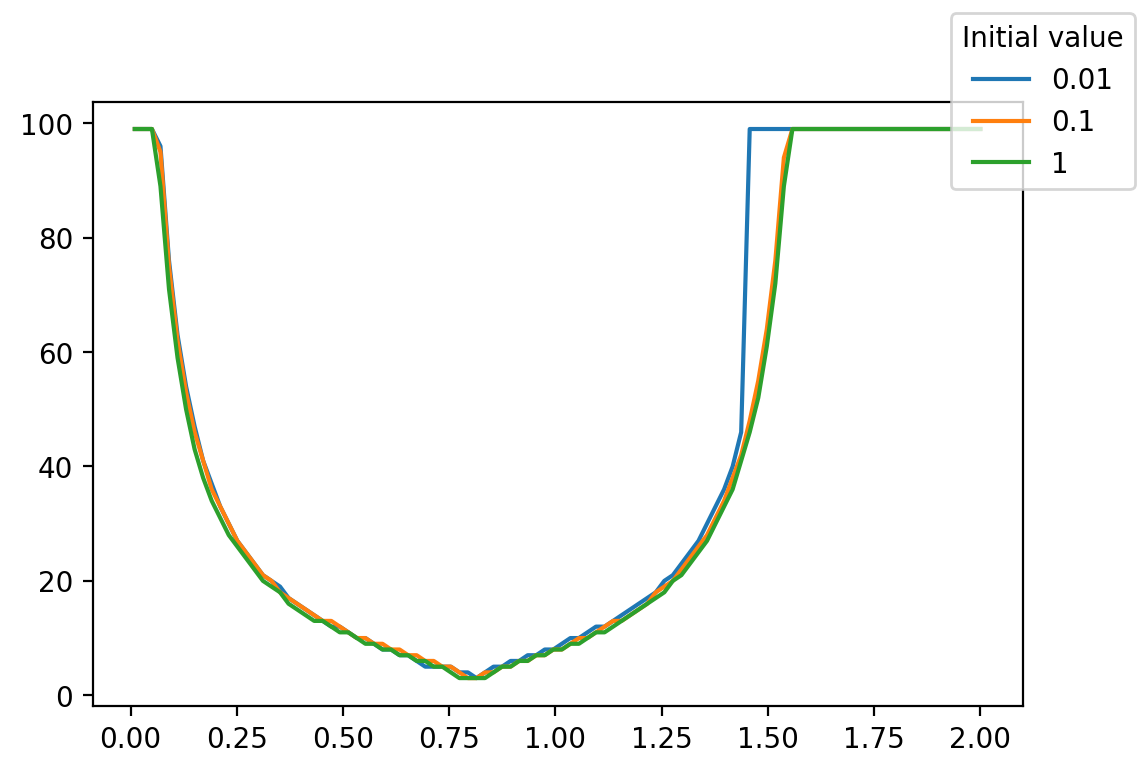

In [5]:
def fixed_point_iteration(f, x0, a = 1.0, eps=1e-5, maxiter=100):
    """Find root of the function using formula x = x - a * f(x)"""
    for niter in range(maxiter):
        x = x0 - a * f(x0)
        if np.abs(x - x0) < eps:
            return (x, niter)
        x0 = x
    return (x, niter)

def f(x: float) -> float:
    return np.sqrt(x) - np.cos(x)


fig, ax = plt.subplots(dpi=200)
for x0 in (0.01, 0.1, 1):
    x = np.linspace(0.01, 2, 100)
    y = [fixed_point_iteration(f, x0, a)[1] for a in x]
    ax.plot(x, y, label=f"{x0}")
fig.legend(title="Initial value")
fig.show()

In [6]:
print(fixed_point_iteration(f, 0.1, 0.8))

(0.6417143843300024, 3)


As we can see above $a \approx 0.8$ is the best (requires least number of steps). And if we deviate from that value number of required steps icreases. Also initial value ($x_0$) is not important.

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.